# Datasaurus Dozen: All have same low order summary statistics

There's a reason why data scientists spend so much time exploring data using graphics. Relying only on data summaries like means, variances, and correlations can be dangerous, because wildly different data sets can give similar results.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/DataSaurusDozen.gif" width=1200 >**bold text**

dino
                x           y
count  142.000000  142.000000
mean    54.263273   47.832253
var    281.069988  725.515961

h_lines
                x           y
count  142.000000  142.000000
mean    54.261442   47.830252
var    281.095333  725.756931

v_lines
                x           y
count  142.000000  142.000000
mean    54.269927   47.836988
var    281.231512  725.638809

x_shape
                x           y
count  142.000000  142.000000
mean    54.260150   47.839717
var    281.231481  725.224991

star
                x           y
count  142.000000  142.000000
mean    54.267341   47.839545
var    281.197993  725.239695

high_lines
                x          y
count  142.000000  142.00000
mean    54.268805   47.83545
var    281.122364  725.76349

dots
                x           y
count  142.000000  142.000000
mean    54.260303   47.839829
var    281.156953  725.235215

circle
                x           y
count  142.000000  142.000000
mean    54.267320   47.837717
var    280

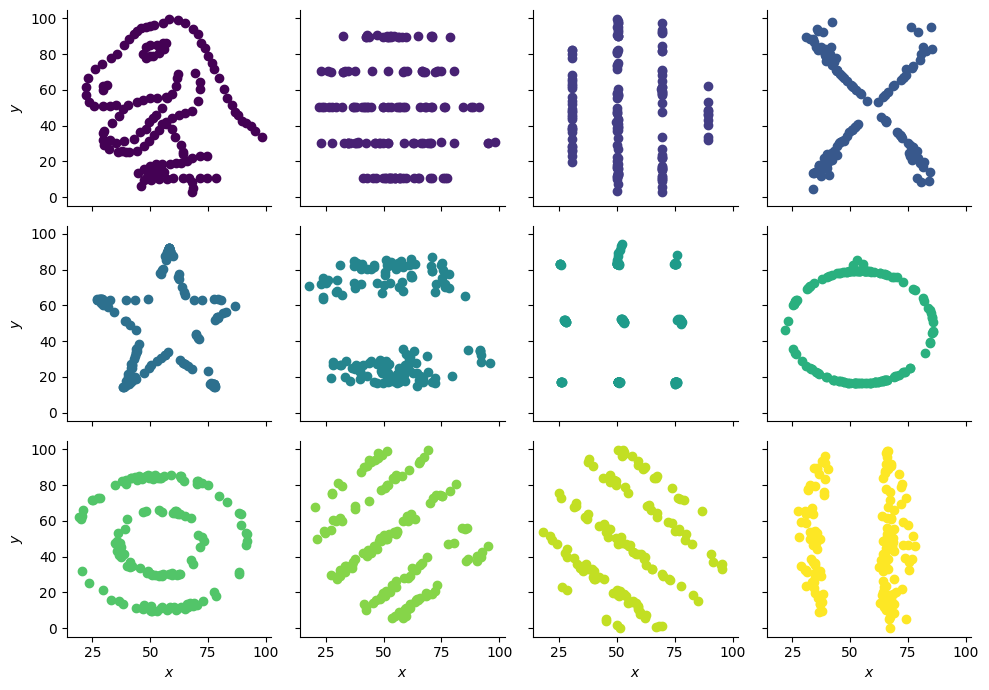

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/probml/probml-data/main/data/DatasaurusDozen.tsv"
df = pd.read_csv(url, sep="\t")

dataset_names = [
    "dino",
    "h_lines",
    "v_lines",
    "x_shape",
    "star",
    "high_lines",
    "dots",
    "circle",
    "bullseye",
    "slant_up",
    "slant_down",
    "wide_lines",
]

fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10, 7))

axs = []
for row in axes:
    for ax in row:
        axs.append(ax)

#color_map = plt.cm.get_cmap(lut=12) # deprecated
color_map = plt.get_cmap('viridis').resampled(12)
color_map = plt.colormaps['viridis'].resampled(12)

for i, name in enumerate(dataset_names):
    print(name)
    name_index = df["dataset"] == name
    data_df = df[name_index]
    data_df = data_df.sort_values(by="x")
    x = data_df["x"].values.reshape(-1, 1)
    y = data_df["y"].values.reshape(-1, 1)

    data = {"x": x, "y": y, "name": name}

    ax = axs[i]

    # Replace the following line with your own plotting logic
    ax.scatter(data["x"], data["y"], label=name, color=color_map(i))

    if i >= 8:
        ax.set_xlabel("$x$")
    if i % 4 == 0:
        ax.set_ylabel("$y$")

    mean_x = data_df["x"].to_numpy().mean()
    mean_y = data_df["y"].to_numpy().mean()
    print(data_df[["x", "y"]].agg(["count", "mean", "var"]), end="\n\n")

    sns.despine()

plt.tight_layout()
plt.savefig("datasaurus12.pdf")
plt.show()
